In [469]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import feature_selection as fs
from sklearn.preprocessing import PowerTransformer
from scipy import stats
from vecstack import stacking
import xgboost as xgb
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import Ridge

In [339]:
import os

In [340]:
print(os.listdir("/home/prateek/study/ML-Assignment/"))

['Abalone_age.ipynb', '.ipynb_checkpoints', '1_abalone.csv', 'Abalone_age_prediction.ipynb']


In [341]:
abalone_data = pd.read_csv('/home/prateek/study/ML-Assignment/1_abalone.csv').dropna()

In [342]:
abalone_data

,Gender,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [343]:
abalone_data.dtypes

Gender         object
length        float64
diameter      float64
height        float64
whole_wt      float64
shucked_wt    float64
viscera_wt    float64
shell_wt      float64
rings           int64
age           float64
dtype: object

brief view

In [344]:
abalone_data.head(3)

,Gender,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9,10.5


Age is essentially just 1.5 more than rings.

In [345]:
abalone_data.drop('rings', axis = 1, inplace = True)
abalone_data.describe()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


# - Univariate Analysis
- No missing values in the dataset
- All numerical features but 'gender'
- Though features are not normaly distributed, are close to normality
- None of the features have minimum = 0 except Height (requires re-check)
- Each feature has difference scale range

array([[<AxesSubplot:title={'center':'length'}>,
        <AxesSubplot:title={'center':'diameter'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'whole_wt'}>],
       [<AxesSubplot:title={'center':'shucked_wt'}>,
        <AxesSubplot:title={'center':'viscera_wt'}>,
        <AxesSubplot:title={'center':'shell_wt'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

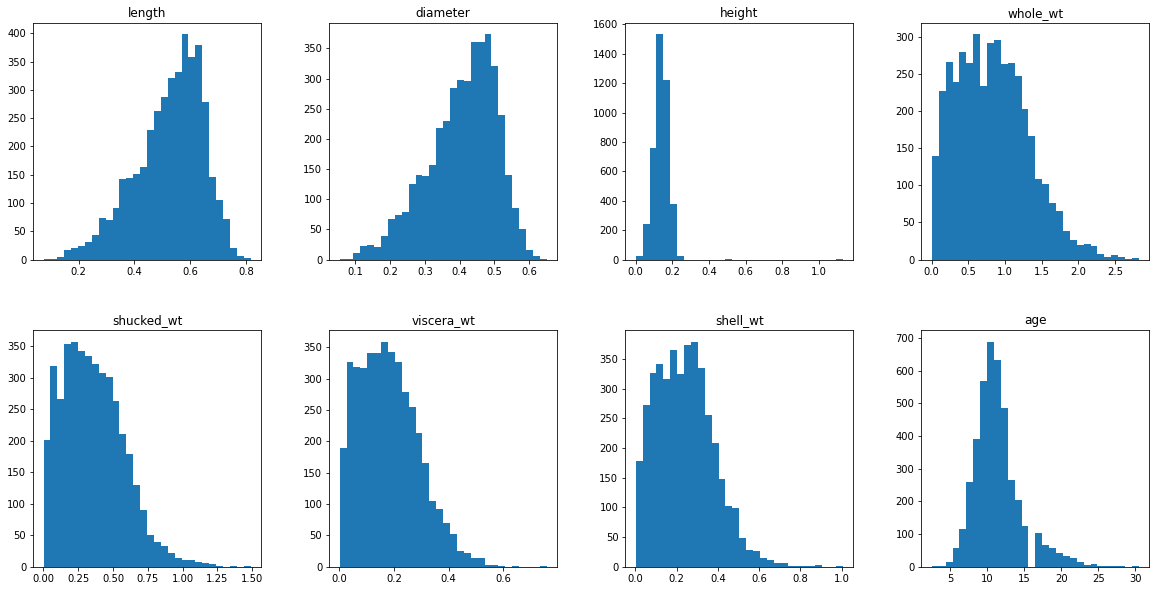

In [346]:
abalone_data.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

In [347]:
numerical_features = abalone_data.select_dtypes(include=[np.number]).columns
categorical_features = abalone_data.select_dtypes(include=[np.object]).columns

In [348]:
numerical_features

Index(['length', 'diameter', 'height', 'whole_wt', 'shucked_wt', 'viscera_wt',
       'shell_wt', 'age'],
      dtype='object')

In [349]:
categorical_features

Index(['Gender'], dtype='object')

In [350]:
skew_values = stats.skew(abalone_data[numerical_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
2,height,3.127694
7,age,1.113702
4,shucked_wt,0.718840
6,shell_wt,0.620704
5,viscera_wt,0.591640
3,whole_wt,0.530768
1,diameter,-0.608979
0,length,-0.639643


Height has highest skewedness, then age and then shucked_wt (can be cross verified through histogram plot), diameter and length are negatively skewed, so they have more weight towards left, others have more weight towards right.

# Missing Values

In [351]:
missing_values = abalone_data.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(abalone_data))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])

,Missing values,% Missing
Gender,0,0.0
length,0,0.0
diameter,0,0.0
height,0,0.0
whole_wt,0,0.0
shucked_wt,0,0.0
viscera_wt,0,0.0
shell_wt,0,0.0
age,0,0.0


No missing values

In [352]:
(abalone_data.height == 0).sum()

2

In [353]:
abalone_data[abalone_data['height'] == 0]

,Gender,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,age
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,9.5
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,7.5


# Bivariate Analysis

In [354]:
mean_data = pd.pivot_table(abalone_data, index = ['Gender'], aggfunc = {'height':np.mean})
mean_data

,height
Gender,
F,0.158011
I,0.107996
M,0.151381


In [355]:
abalone_data['height']=abalone_data['height'].replace(to_replace = 0, value = 0.107996)

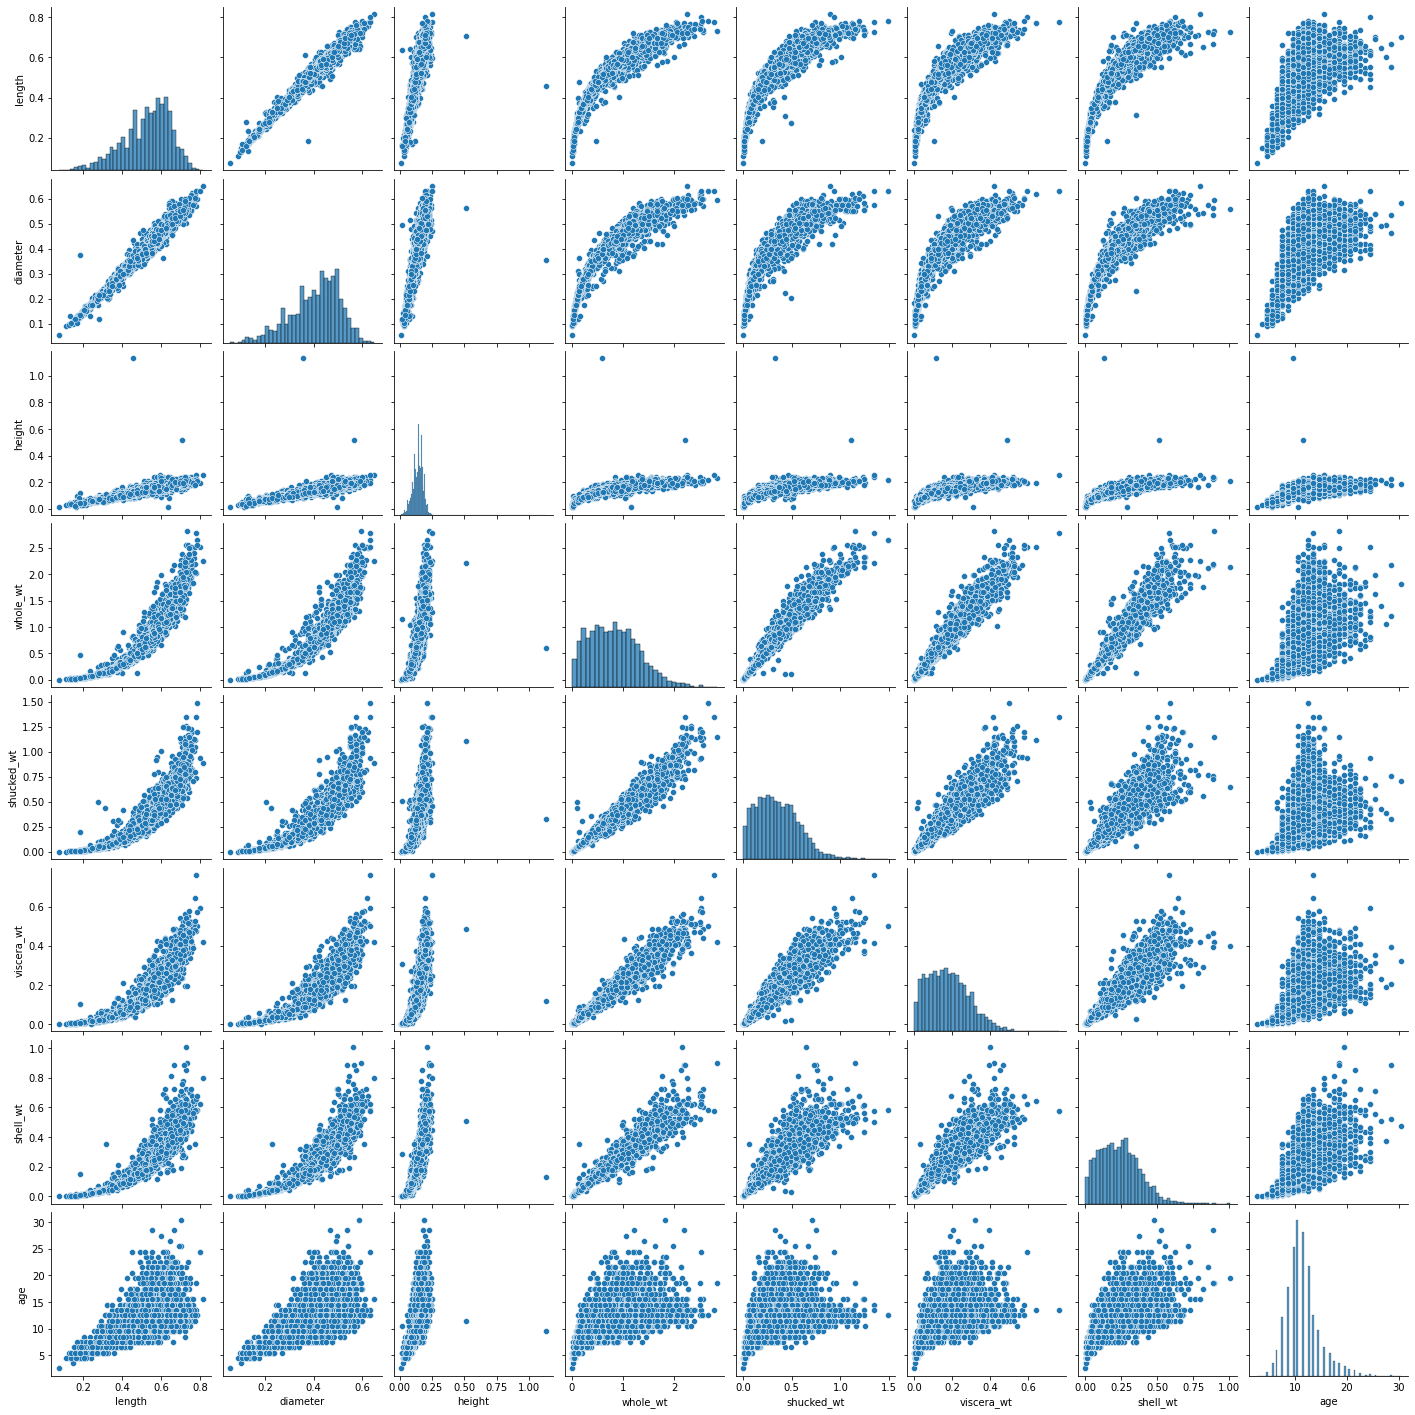

In [356]:
sns.pairplot(abalone_data[numerical_features])

## - Insights
length is linearly correlated with diameter while, non-linear relation with height, whole weight, shucked weight, viscera weight and shell weight

<AxesSubplot:>

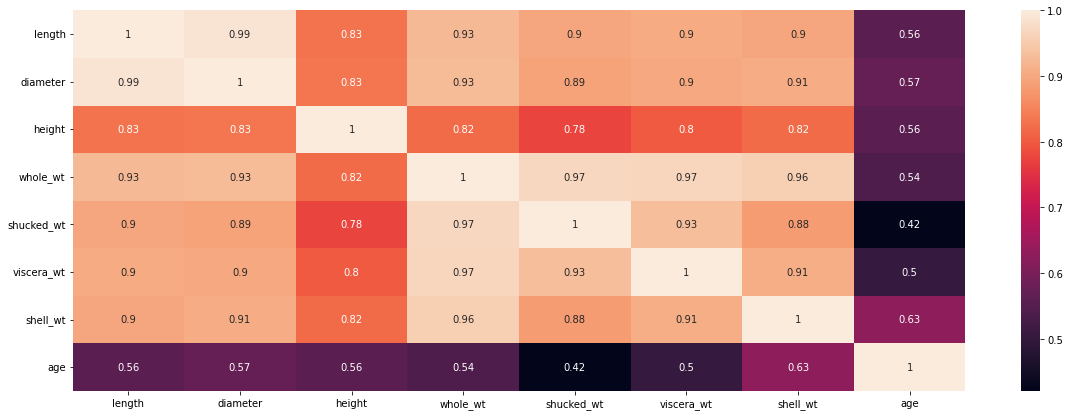

In [357]:
plt.figure(figsize=(20,7))
sns.heatmap(abalone_data[numerical_features].corr(), annot=True)

whole_wt is linearly varying with all other features except age
height has least linearity with remaining features
age is most linearly proprtional with shell_wt followed by diameter and length
age is least correlated with shucked_wt

# CLASSIFICATION

## one-hot-encoding 

Removing the "age" feature from the full dataset, this becomes "target". The rest of the features are the descriptive features called "data_all"

In [358]:
data_all = abalone_data.drop(columns="age")
target = abalone_data["age"]

In [359]:
data_all = data_all.dropna()
data_all

,Gender,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [360]:
target = target.dropna()

In [361]:
from sklearn.utils.multiclass import type_of_target
type_of_target(target)

'continuous'

In [362]:
target.max()

30.5

In [363]:
target.mean()

11.433684462532918

In [364]:
df['target_label'] = pd.cut(df.age,bins=[0,5,9,12,15,31],labels=['Infant','Child','Young','Adult','old'])

In [365]:
df

,Gender,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age,target_label
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5,old
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5,Child
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5,Young
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5,Young
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5,Child
...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5,Adult
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5,Young
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5,Young
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5,Young


In [366]:
data_all = df.drop(['target_label','age','rings'], axis = 1)
data_all = pd.get_dummies(data_all)
target = df['target_label']

In [367]:
target

0         old
1       Child
2       Young
3       Young
4       Child
        ...  
4172    Adult
4173    Young
4174    Young
4175    Young
4176    Adult
Name: target_label, Length: 4177, dtype: category
Categories (5, object): ['Infant' < 'Child' < 'Young' < 'Adult' < 'old']

In [368]:
target.value_counts(normalize = 'True')

Young     0.452717
Adult     0.229112
Child     0.196792
old       0.117309
Infant    0.004070
Name: target_label, dtype: float64

Classes of target is not balanced

- X is data_all
- Y is target
- Now we perform data split and perform classification on all features as suggested in the assignment

In [369]:
clf = KNeighborsClassifier(n_neighbors=1)

In [393]:
X_train, X_test, y_train, y_test = train_test_split(data_all, target, test_size = 0.2, random_state=100)

In [394]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [395]:
print(clf.predict(X_test))

['Young' 'Adult' 'Adult' 'Young' 'Child' 'Young' 'old' 'Adult' 'Child'
 'Infant' 'Young' 'Young' 'Child' 'Child' 'Young' 'Young' 'Young' 'Child'
 'Young' 'old' 'Young' 'Young' 'Adult' 'old' 'old' 'Child' 'Young' 'Adult'
 'old' 'old' 'Young' 'Adult' 'old' 'Young' 'Child' 'Young' 'Young' 'Child'
 'Young' 'Young' 'Adult' 'Young' 'Young' 'Adult' 'Adult' 'Young' 'old'
 'Adult' 'old' 'Young' 'Young' 'old' 'Child' 'Young' 'Young' 'Young'
 'Young' 'Adult' 'Young' 'Young' 'Adult' 'Adult' 'Child' 'Adult' 'Young'
 'Young' 'Adult' 'Young' 'Young' 'Adult' 'Young' 'Child' 'Young' 'Young'
 'Young' 'Adult' 'Young' 'Young' 'Child' 'Young' 'Adult' 'Adult' 'Adult'
 'Adult' 'Child' 'Young' 'Adult' 'Child' 'Adult' 'Young' 'old' 'old'
 'Young' 'Child' 'Child' 'Young' 'Young' 'Young' 'Young' 'Adult' 'old'
 'Young' 'Adult' 'Young' 'Young' 'Adult' 'Young' 'Adult' 'Child' 'Child'
 'Young' 'Young' 'old' 'Child' 'Child' 'Young' 'Young' 'Child' 'Young'
 'Young' 'Adult' 'Adult' 'Adult' 'Adult' 'Young' 'Young' 'Adul

In [396]:
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [397]:
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

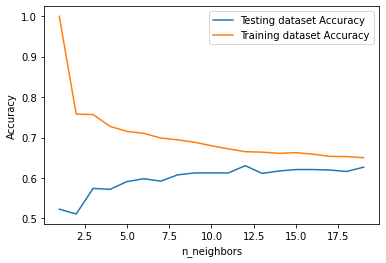

In [398]:
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [408]:
max(test_accuracy)

0.6303827751196173

In [399]:
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5)
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_gini.predict(X_test)

In [400]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_gini)

array([[ 91,   1,   0,  93,   9],
       [  1, 128,   1,  33,   0],
       [  0,   3,   2,   0,   0],
       [ 78,  31,   0, 262,  10],
       [ 35,   0,   0,  40,  18]])

In [401]:
confusion_matrix(y_test, y_pred_entropy)

array([[ 91,   1,   0,  93,   9],
       [  1, 128,   1,  33,   0],
       [  0,   3,   2,   0,   0],
       [ 78,  31,   0, 262,  10],
       [ 35,   0,   0,  40,  18]])

In [409]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_gini)

0.5992822966507177

In [410]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_entropy)

0.5992822966507177

In [404]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

       Adult       0.44      0.47      0.46       194
       Child       0.79      0.79      0.79       163
      Infant       0.67      0.40      0.50         5
       Young       0.61      0.69      0.65       381
         old       0.49      0.19      0.28        93

    accuracy                           0.60       836
   macro avg       0.60      0.51      0.53       836
weighted avg       0.59      0.60      0.59       836



In [405]:
print(classification_report(y_test,y_pred_entropy))

              precision    recall  f1-score   support

       Adult       0.44      0.47      0.46       194
       Child       0.79      0.79      0.79       163
      Infant       0.67      0.40      0.50         5
       Young       0.61      0.69      0.65       381
         old       0.49      0.19      0.28        93

    accuracy                           0.60       836
   macro avg       0.60      0.51      0.53       836
weighted avg       0.59      0.60      0.59       836



Accuracy of KNN is better than Decision Tree for our case.

# Regression

In [412]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR

In [434]:
target_reg = df['age']
data_reg = df.drop(['target_label', 'rings', 'age'], axis =1)
data_reg
target_reg

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: age, Length: 4177, dtype: float64

In [435]:
data_reg = pd.get_dummies(data_reg)
data_reg = preprocessing.normalize(data_reg)

In [436]:
X_train, X_test, y_train, y_test = train_test_split(data_reg, target_reg, test_size = 0.3, random_state = 0)

In [439]:
regressor_DT = DecisionTreeRegressor(random_state = 0)  
regressor_DT.fit(X_train, y_train) 
y_pred_regression_decision_tree = regressor_DT.predict(X_test)
mse_dt=mean_squared_error(y_test, y_pred_regression_decision_tree)
r2_dt=r2_score(y_test, y_pred_regression_decision_tree)
mae_dt=mean_absolute_error(y_test,y_pred_regression_decision_tree)
print('mae:', mae_dt)
print('mse:', mse_dt)
print('r2:', r2_dt)

mae: 2.028708133971292
mse: 8.352472089314194
r2: 0.2077715903177093


In [440]:
linearRegressor = LinearRegression()
linearRegressor.fit(X_train, y_train)
y_pred_regression_linear = linearRegressor.predict(X_test)
mse_lr=mean_squared_error(y_test, y_pred_regression_linear)
r2_lr=r2_score(y_test, y_pred_regression_linear)
mae_lr=mean_absolute_error(y_test,y_pred_regression_linear)
print('mae:', mae_lr)
print('mse:', mse_lr)
print('r2:', r2_lr)

mae: 1.5110072453250496
mse: 4.737879849931786
r2: 0.5506141201502153


In [442]:
polynomial_features= PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.fit_transform(X_test)
model = LinearRegression()
model.fit(X_poly, y_train)
y_pred_regression_poly = model.predict(X_poly_test)

mse_pr=mean_squared_error(y_test, y_pred_regression_poly)
r2_pr=r2_score(y_test, y_pred_regression_poly)
mae_pr=mean_absolute_error(y_test,y_pred_regression_poly)
print('mae:', mae_pr)
print('mse:', mse_pr)
print('r2:', r2_pr)

mae: 1.4538321122408293
mse: 4.396217851167281
r2: 0.5830206147826686


In [444]:
regressor_SVR = SVR(kernel='rbf')
regressor_SVR.fit(X_train,y_train)
y_pred_regression_svr = regressor_SVR.predict(X_test)

mse_svr=mean_squared_error(y_test, y_pred_regression_svr)
r2_svr=r2_score(y_test, y_pred_regression_svr)
mae_svr=mean_absolute_error(y_test,y_pred_regression_svr)
print('mae:', mae_svr)
print('mse:', mse_svr)
print('r2:', r2_svr)

mae: 1.5223675487249941
mse: 5.31198877404087
r2: 0.4961601339449534


Polynomial regression seems to perform the best here with lowest mse and mae values

# Ensemble ML

In [447]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train);
y_pred_rf = rf.predict(X_test)

mse_rf=mean_squared_error(y_test, y_pred_rf)
r2_rf=r2_score(y_test, y_pred_rf)
mae_rf=mean_absolute_error(y_test,y_pred_rf)
print('mae:', mae_rf)
print('mse:', mse_rf)
print('r2:', r2_rf)

mae: 1.5237161084529505
mse: 4.729308771929825
r2: 0.5514270832373287


In [448]:
y_pred_final = (y_pred_regression_decision_tree+y_pred_regression_linear
                +y_pred_regression_poly+y_pred_regression_svr+y_pred_rf)/5.0

In [449]:
print(mean_squared_error(y_test, y_pred_final))

4.483434169252182


## Trying Stacking Ensemble technique

In [462]:
X_train, X_test, y_train, y_test = train_test_split(data_reg, target_reg, test_size=0.20)

In [471]:
lr = LinearRegression()
svr_lin = SVR(kernel='linear')
ridge = Ridge(random_state=1)
svr_rbf = SVR(kernel='rbf')

stregr = StackingRegressor(regressors=[svr_lin, lr, ridge], meta_regressor=svr_rbf)

stregr.fit(X_train, y_train)
y_pred_stack = stregr.predict(X_test)

mse_stack=mean_squared_error(y_test, y_pred_stack)
r2_stack=r2_score(y_test, y_pred_stack)
mae_stack=mean_absolute_error(y_test,y_pred_stack)
print('mae:', mae_rf)
print('mse:', mse_rf)
print('r2:', r2_rf)

mae: 1.5237161084529505
mse: 4.729308771929825
r2: 0.5514270832373287
